# Mini-Project--1

## Application of Deep Neural Networks in Diabetes Biomarkers prediction Development

## Abstract : 

Machine learning and Deep Learning are popular technologies which are innovating the world, predicting outcomes and plays an important role in making good decisions. In a sector like healthcare, it is interesting to note how deep learning and machine learning can be beneficial in diagnosis and treatment of diseases like Diabetes.Diabetes is one of the most popular disease affecting the patients due to lack of insulin content in the body.Biomarkers are basically the indicators which helps in diagnosis of a health condition or disease. This plays an important role in diagnostic department of healthcare sector. Through this project, we are trying to implement deep learning technique in healthcare. 

This project aims using different machine learning and deep learning techniques to identify different diabetes biomarkers present in the blood sample of various patients. Developing a neural network model to predict whether person will have diabetes. 

## Purpose :

Purpose of the project is to use different machine learning techniques and also deep learning techniques to predict the output and compare the performance of deep neural networks over traditional machine learning models.

## Acknowledgements:
The Dataset is aquired from Kaggle competition which is located at https://www.kaggle.com/uciml/pima-indians-diabetes-database. The entire data is belong to National Institute of Diabetes and Digestive and Kidney Diseases 

## About the data set
The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## Techniques Used: 

We will be using different machine learning as well as deep learning techniques to understand and predict the given outcome.

### Machine Learning techniques Used:
Decision Tree, Random Forests, KNN etc. 

### Deep Learning Techniques Used: 

Artificial Neural Network with different number of layers, neurons and activation functions. 

### Evaluation Metrics Used:

We will be employing Accuracy, AUC-ROC curve, binary cross entropy. We will be plotting the graphs to check training and validation accuracy as well as training and validation loss.

## About Dataset

Dataset has been taken from Kaggle. 
This dataset comprises of blood sample of different patients used to depict whether person will have diabetes or not.

Sample Size : 768

No of features: 9

Type of problem: Binary classification. 

### Exploring the dataset 

We will be reading the dataset and importing into a dataframe and understand different statistical aspects of the dataset. We will check if null values are present in the dataset.

In [1]:
#importing sklearn and traditional Python machine learning libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
from mlxtend.preprocessing import minmax_scaling
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
## For scaling data 
from mlxtend.preprocessing import minmax_scaling 
# Tensorflow 
import tensorflow as tf
# importing keras, tensorflow and related modules
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential # intitialize the ANN
from keras.layers import Dense, Dropout      # create layers
from keras.optimizers import Adam, SGD, RMSprop

In [2]:
# importing the dataset and initializing a dataframe.
diabetes_df=pd.read_csv("https://raw.githubusercontent.com/Poojithamuppalla/pimadeeplearningPrediction/main/diabetes.csv", decimal = ',')



### Exploratory Data Analysis and Data Cleaning

Here, we will be exploring the data and check for null values, improper formats and other data related issues. We will resolve these issues and clean the data which can be furthur used for building the model. 

In [3]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_df.shape

(768, 9)

In [5]:

display(diabetes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Pregnancies               768 non-null    int64 
 1   Glucose                   768 non-null    int64 
 2   BloodPressure             768 non-null    int64 
 3   SkinThickness             768 non-null    int64 
 4   Insulin                   768 non-null    int64 
 5   BMI                       768 non-null    object
 6   DiabetesPedigreeFunction  768 non-null    object
 7   Age                       768 non-null    int64 
 8   Outcome                   768 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 54.1+ KB


None

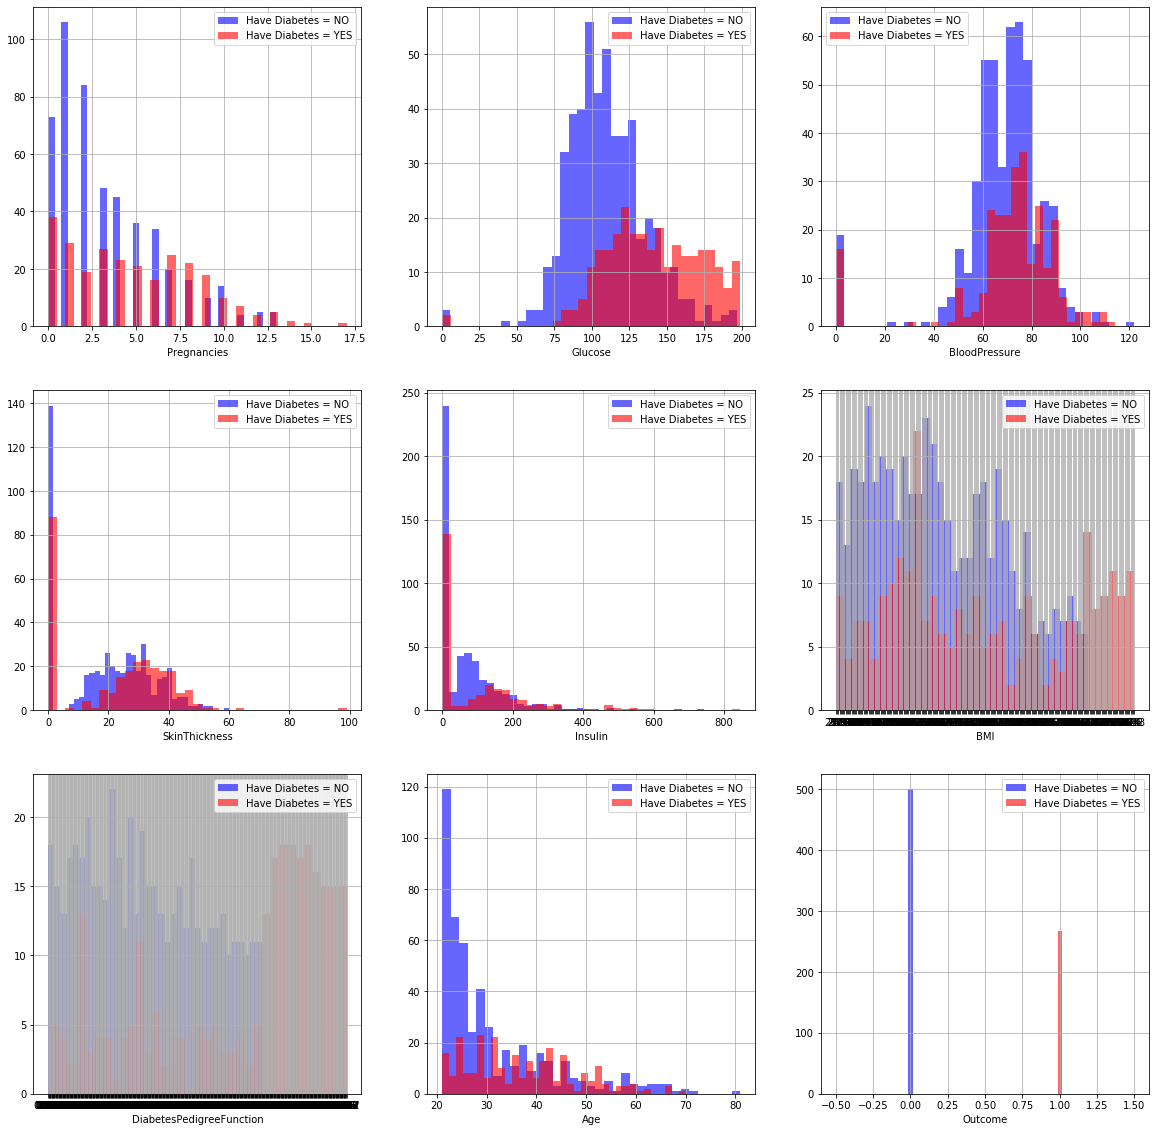

In [6]:
# Visulazing the distibution of the data for every feature
plt.figure(figsize=(20, 20))

for i, column in enumerate(diabetes_df.columns, 1):
    plt.subplot(3, 3, i)
    diabetes_df[diabetes_df["Outcome"] == 0][column].hist(bins=35, color='blue', label='Have Diabetes = NO', alpha=0.6)
    diabetes_df[diabetes_df["Outcome"] == 1][column].hist(bins=35, color='red', label='Have Diabetes = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

### Affected People from Diabetes

### Data Pre-processing and Exploratory Data Analysis

Before any model building, it is essential to understand the data properly, understand the importance of various features of the dataset. It is essential to clean the dataset and prepare it for model building so that predicting outcome is easier and more efficient. 

One part of data pre-processing is checking for the missing values in the dataset. Below line of code executed shows number of missing values in the dataset. 

In [7]:
# checking whether there are any missing values in the dataset.
diabetes_df.isnull().values.any()

False

In [8]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.0,1.0,3.0,6.00,17.0
Glucose,768.0,120.894531,31.972618,0.0,99.0,117.0,140.25,199.0
BloodPressure,768.0,69.105469,19.355807,0.0,62.0,72.0,80.00,122.0
SkinThickness,768.0,20.536458,15.952218,0.0,0.0,23.0,32.00,99.0
Insulin,768.0,79.799479,115.244002,0.0,0.0,30.5,127.25,846.0
Age,768.0,33.240885,11.760232,21.0,24.0,29.0,41.00,81.0
Outcome,768.0,0.348958,0.476951,0.0,0.0,0.0,1.00,1.0


Its great to see that there is no null element present. Thus we do not need to fill or drop empty cells. However on close inspection I found that there are many '0' values that doesn't make anysense. So we are considering them as null values.

Data is related to healthcare Industry having 768 observations with 9 variable. Target variable is Outcome. It looks like there is no missing value, and boolean, float , integers are different datatypes available. Well descriptive analysis shows that variable Glucose, BoodPressure,SckinThickness, Insulin and BMI have minimum value 0 which does not make any sense, these values are either missing or outliers, But i am not going to alter them so that i can see actual statistics of Data. I can see in Pregnancies column, minimum is 0 (May be this is sign for no pregnancy) which is considerable, But maximum month of pregnancy is 17 which does not make any sense. Variance among different predictor variable is varying at large scale , Scaling data will be helpful for Predective modelling.

In [9]:

diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN) 

In [10]:
## Checking the new null values found.
diabetes_df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [11]:
diabetes_df['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

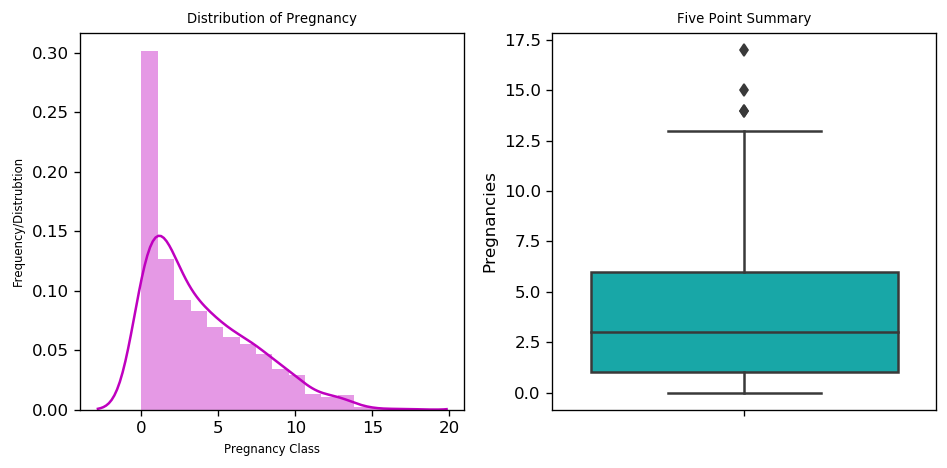

In [12]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(diabetes_df['Pregnancies'],ax=axes[0],color='m')
axes[0].set_title('Distribution of Pregnancy',fontdict={'fontsize':8})
axes[0].set_xlabel('Pregnancy Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Pregnancies',data=diabetes_df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Well, we are done with Pregnancy variable. Let us see next one.

In [13]:
diabetes_df['Glucose'].describe()

count    763.000000
mean     121.686763
std       30.535641
min       44.000000
25%       99.000000
50%      117.000000
75%      141.000000
max      199.000000
Name: Glucose, dtype: float64

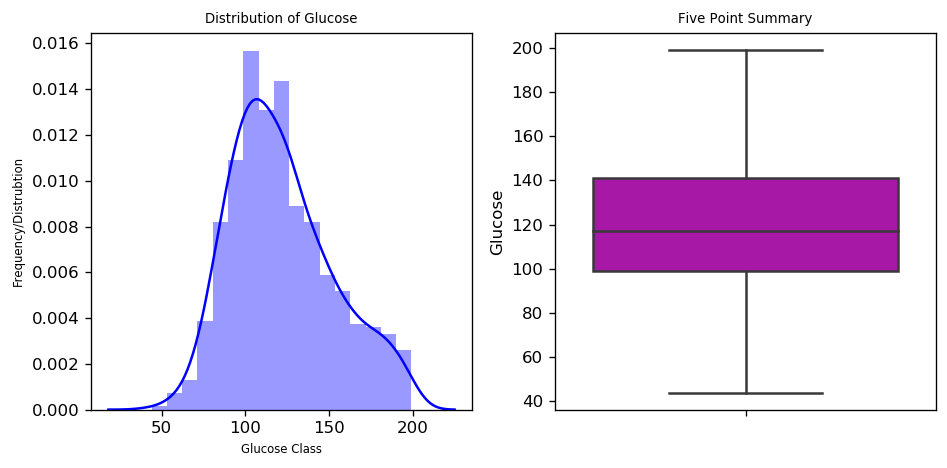

In [14]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(diabetes_df['Glucose'],ax=axes[0],color='b')
axes[0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Glucose',data=diabetes_df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Glucose = 0, does not make any sense.

In [15]:
# Define missing plot to detect all missing values in dataset
def missing_plot(dataset, key) :
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((dataset.isnull().sum())/len(dataset[key])*100, columns = ['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = '#7EC0EE',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values (count & %)")

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)
    

In [16]:
missing_plot(diabetes_df,'Outcome')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe96f63aa50>,
      dtype=object)

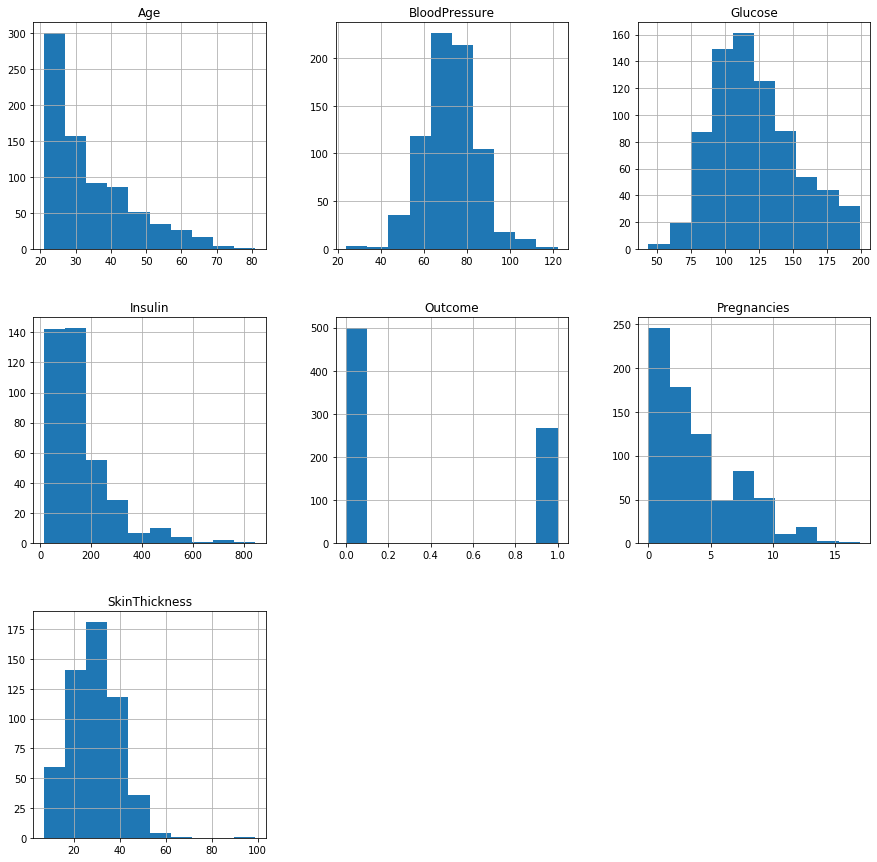

In [17]:
diabetes_df.hist(figsize=(15,15))

Now,Lets fill the null values with the median.

In [18]:
diabetes_df['Glucose'].fillna(diabetes_df['Glucose'].median(), inplace = True)
diabetes_df['BloodPressure'].fillna(diabetes_df['BloodPressure'].mean(), inplace = True)
diabetes_df['SkinThickness'].fillna(diabetes_df['SkinThickness'].mean(), inplace = True)
diabetes_df['Insulin'].fillna(diabetes_df['Insulin'].median(), inplace = True)
diabetes_df['BMI'].fillna(diabetes_df['BMI'].median(), inplace = True)

In [19]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.0,1.00,3.000000,6.00,17.0
Glucose,768.0,121.656250,30.438286,44.0,99.75,117.000000,140.25,199.0
BloodPressure,768.0,72.405184,12.096346,24.0,64.00,72.202592,80.00,122.0
SkinThickness,768.0,29.153420,8.790942,7.0,25.00,29.153420,32.00,99.0
Insulin,768.0,140.671875,86.383060,14.0,121.50,125.000000,127.25,846.0
Age,768.0,33.240885,11.760232,21.0,24.00,29.000000,41.00,81.0
Outcome,768.0,0.348958,0.476951,0.0,0.00,0.000000,1.00,1.0


In [20]:

display(diabetes_df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Now all the null values are replaced .We can procced with feature Engineering

0    500
1    268
Name: Outcome, dtype: int64


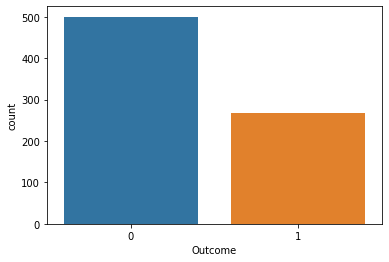

In [21]:
print(diabetes_df['Outcome'].value_counts())
sns.countplot(diabetes_df['Outcome'])

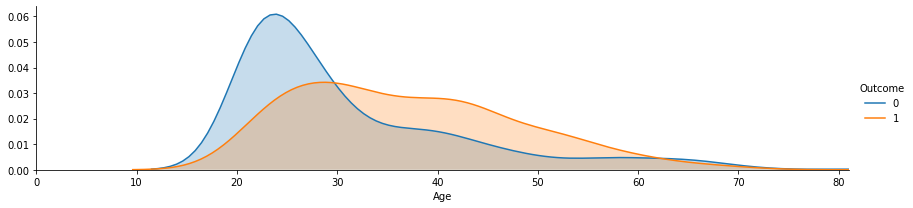

In [22]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(diabetes_df, hue="Outcome", aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = diabetes_df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

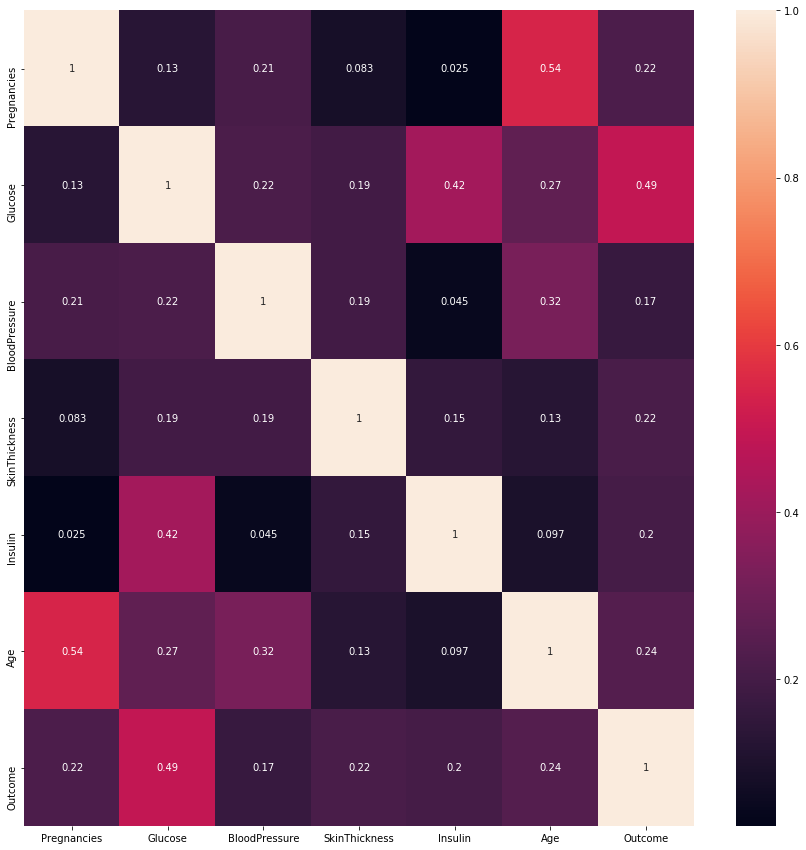

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(diabetes_df.corr(),annot=True)


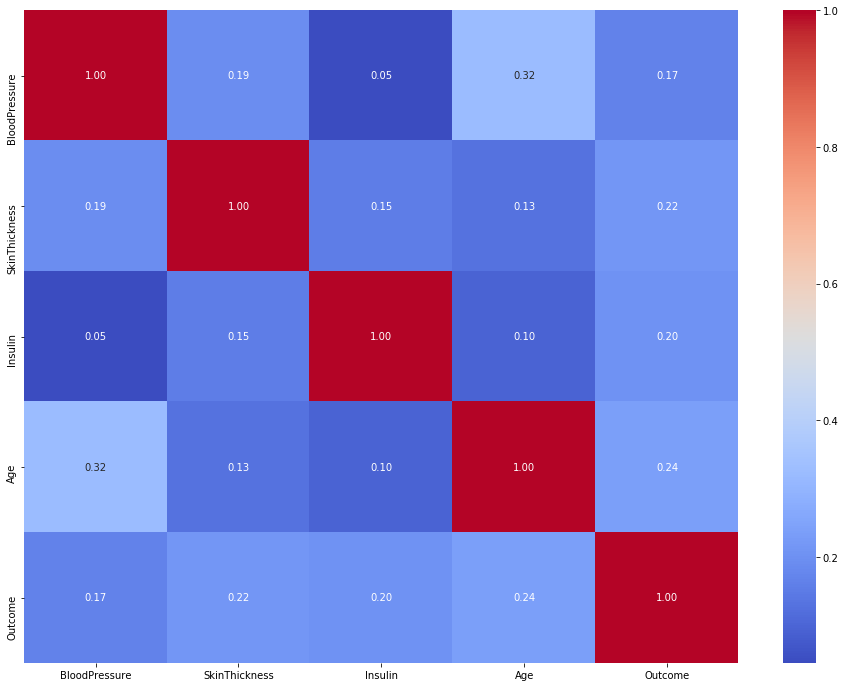

In [24]:
plt.figure(figsize=(16,12))
sns.heatmap(data=diabetes_df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

We find 3 pairs which were having good correlations.

In [25]:
def plot_feat1_feat2(feat1, feat2) :  
    D = diabetes_df[(diabetes_df['Outcome'] != 0)]
    H = diabetes_df[(diabetes_df['Outcome'] == 0)]
    trace0 = go.Scatter(
        x = D[feat1],
        y = D[feat2],
        name = 'diabetic',
        mode = 'markers', 
        opacity=0.8,
        marker = dict(color = 'lightskyblue',
            line = dict(
                width = 1)))

    trace1 = go.Scatter(
        x = H[feat1],
        y = H[feat2],
        name = 'healthy',
        opacity=0.8,
        mode = 'markers',
        marker = dict(color = 'indigo',
            line = dict(
                width = 1)))

    layout = dict(title = feat1 +" "+"vs"+" "+ feat2,
                  yaxis = dict(title = feat2,zeroline = False),
                  xaxis = dict(title = feat1, zeroline = False)
                 )

    plots = [trace0, trace1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

In [26]:
plot_feat1_feat2('Pregnancies', 'Age')

From the above plot ,we can see that people with Age < 35 and Pragnancies < 6 are less likly to be affected with diageties.

In [27]:
plot_feat1_feat2('Glucose', 'Insulin')

Here we can see that people with Glucose> 100 and Insulin > 180 are more likly to be affected with diageties.

In [28]:
plot_feat1_feat2('SkinThickness', 'BMI')

Here we can see that people with SkinThickness< 30 and BMI <45 are less likly to be affected with diageties

#### Feature Scaling and why is it important?

It is a part of data pre-processing which is applied to independent variables or features of the data. 

It is important to normalize the data within a particular range and sometimes it helps in speeding up the calculations in an algorithm. 

Below line of code shows scaling of features in the dataset. 

We are doing this step as to to load the data in the model and avoid multi-variable multi-output data problem.

In [29]:
# scale all the columns except the 'outcome'
scaled_data = minmax_scaling(diabetes_df,columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

In [30]:
# defining variables X and Y. Y variable has the target value and X variable has other features in the dataset. 
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["Outcome"].values

In [31]:
# splitting the data into train and test data in the ratio 70% and 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
#return X_train, X_test, y_train, y_test

(537, 8) (537,) (231, 8) (231,)


### Applying Machine Learning Techniques

We will use Random Forests, K-Nearest Neighbors, Decision Trees to predict the outcome. We will also check for accuracy, AUC-ROC score values. 

### Logistic Regression

In [32]:
X = diabetes_df.drop('Outcome',axis=1)
y = diabetes_df['Outcome']


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [34]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [35]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,y_train)
lg_pred = lg.predict(X_test)

In [36]:

print (lg.fit)

<bound method LogisticRegression.fit of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>


In [37]:

lg_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [38]:
# Predicting the test set results and creating confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, lg_pred)
print(confusion_matrix)

[[132  14]
 [ 37  48]]


In [39]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lg.score(X_test, lg_pred)))

Accuracy of logistic regression classifier on test set: 1.00


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lg_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       146
           1       0.77      0.56      0.65        85

    accuracy                           0.78       231
   macro avg       0.78      0.73      0.75       231
weighted avg       0.78      0.78      0.77       231



The recall rate of 0 is more as there are high in number compared to 1

In [41]:
y_pred_proba = lg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

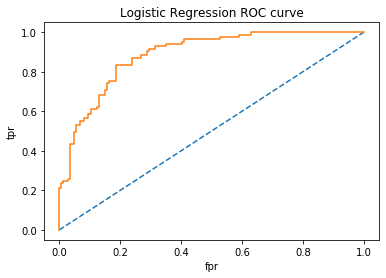

In [42]:
plt.plot([0,1],[0,1],'--')
plt.plot(fpr,tpr, label='LG')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Logistic Regression ROC curve')
plt.show()

In [43]:
print("The AUC score for the given model is :",roc_auc_score(y_test,y_pred_proba))

The AUC score for the given model is : 0.886140209508461


Auc for the Logisitic Regression is 0.88

### Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [46]:

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Decision Tree is 0.7316017316017316


## The Accuracy for the Decission Tree is 0.71

### Random Forest Classifier

Random Forests are also known as random decision forests is a popular ensemble method useful for predicting the outcome. 

Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object.

Hyperparameters for Random Forests Classifier: Total Number of trees to be generated and decision tree related parameters like minimum split, split criteria etc.

In [47]:
rf_model = RandomForestClassifier(n_estimators=300)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
# Make predictions on the test set - both "hard" predictions, and the scores (percent of trees voting yes)
y_pred_class_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)

print('Accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)))
print('ROC-AUC is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))

Accuracy is 0.805
ROC-AUC is 0.874


In [49]:

plot_roc(y_test, y_pred_prob_rf[:, 1], 'Random Forests')

NameError: name 'plot_roc' is not defined

#### Accuracy obtained is 78.4 % and AUC-ROC value is 0.879 by employing Random Forest Model. 

### Using K-Nearest neighbors method

K-Nearest neighbor classifier is a popular algorithm useful for classification problems.

K-nearest neighbor algorithm predicts the class of the data point as per the majority of the votes obtained from the neighboring points and calculates distance such as Euclidean distance, hamming distance, cosine distance etc. Based on the votes, label is assigned to the new data point which needs to be predicted.  

In [ ]:
ds_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

In [ ]:
X = diabetes_df.iloc[:, 0:8]
y = diabetes_df.iloc[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11111, test_size=0.3)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
# Define the model: Init K-NN
classifier = KNeighborsClassifier(n_neighbors=7, p=2, metric='euclidean')

In [ ]:
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluate Model
from sklearn.metrics import f1_score
#evaluate_cm = confusion_matrix(y_test, y_pred)
#print (evaluate_cm)
print(f1_score(y_test, y_pred))

In [ ]:
# creating the confusion matrix
#evaluate_cm = confusion_matrix(y_test, y_pred)
#print (evaluate_cm)
print('F1 score is ' ,f1_score(y_test, y_pred))
print('Accuracy is' , accuracy_score(y_test, y_pred))

In [ ]:
plot_roc(y_test, y_pred, 'KNN')

#### Accuracy score obtained from KNN method = 74.8%

###  Gradient Boosting Classifier

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. 

It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

In [ ]:
params = {'max_depth':9, 'subsample':0.5, 'learning_rate':0.01, 'min_samples_leaf':1, 'random_state':42}
gbc = GradientBoostingClassifier(n_estimators=290, **params)
clf_ = gbc.fit(X_train, y_train)
y_pred = clf_.predict(X_test)
print('Accuracy is {}'.format(accuracy_score(y_test,y_pred )))
train_predict(gbc, X_train, y_train, X_test, y_test)

In [ ]:
plot_roc(y_test, y_pred, 'GBC')

#### Accuracy obtained by applying Gradient Boosting Classifier is 77.9%

Using all 5 techniques , we see that best accuracy obtained from Gradient Boosting Classifier which is 77.9%

Now, we need to develop a neural network model to see how well it performs and if they can achieve a better accuracy from these models. Wide and deep neural networks usually performs better but we need to experiment and see which model performs better. 

## Developing Deep Learning Neural Network Model 

Artificial Neural Network is a computational model based on the biological neural network which consists of various neurons and attempts to simulate the network of neurons so that it can learn the pattern programmatically and make better decisions.

ANN comprises of input layer , output layer and hidden layers. Weights are assigned to them and using the backward propagation mechanism, weights are updated accordingly. 

### Important Terminologies and Concepts to understand Neural Network Model 

#### Activation Functions:
Activation functions play an important role in neural network model because they introduce non-linearity. The main purpose is to convert a input signal of a node in a ANN to an output signal. This output signal now used as an input in the next layer in the stack. 

In ANN, we compute the sum of products of inputs and their corresponding weights and then apply activation function f(x) to it to get the output layer and feed it as an input to the next layer. There are various kinds of activation function. Only discussing the most popular activation functions used in the project. 

#### Sigmoid activation function: 
It is an activation function of form f(x)=1/1+exp(-x) . Range is between 0 and 1. Useful for binary classification problems. 

#### Tanh activation function:
Its mathematical formula is f(x)=1-exp(-2x)/1+exp(-2x). Its output is zero centered because its range in between -1 and 1. Optimization is easier in this case and generally preferred over sigmoid function. 

#### RELU activation function:
It is also popularly called as linear rectified unit. It returns the value provided as input directly, or the value 0.0 if the input is less than zero. 

Function can be described as g(z) = max{0,z}


In [ ]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)
print('X_train_normalized is' , X_train_norm)
print('X test normalized is ',X_test_norm)

### Developing a neural network model with 1 hidden layer. 

Here, we have defined a model having 3 dense layers. 
First is the input layer wherein we have defined an input shape which is 8 and also defined activation function. I have used RELU activation function and as 12 neurons. 

Second layer consists of a hidden layer having 8 neurons and RELU activation function. 

Third layer is the output layer having just 1 neuron and used Sigmoid activation function as the output ranges between 0 and 1. Sigmoid functions are useful for binary classification problems. 

We have used Sequential class from Keras library wherein you can build a model, define the layers, input and output. 

There are 4 major steps involved in model building:
1. Define a model
2. Compile the model
3. Fit the data into the model
4. Predict the outcome

In [ ]:
# definining a model with input, 1 hidden layer and output layer.
def nn_model_1(model):
    model.add(Dense(12, input_shape=(8,), activation="relu"))
    model.add(Dense(8, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    return model

In [ ]:
# calling the above function and initializing the model.
model = Sequential()
model = nn_model_1(model)

In [ ]:
#prints the model summary
model.summary()

#### Understanding the model compile method:

#### Optimizers used:

There are different options of optimizers which can be used in the model such as Adam , SGD and RMSProp. Most popular is SGD which is nothing but Stochastic Gradient Descent.This is useful to minimize the loss function and computes the gradientat each iteration and then helps in updating the weights in the model using backward propagation algorithm. We have used SGD as an optimizer in the model in the whole project. There are others which can be used in the model as well such as Adam or RMSProp.

#### Binary Cross Entropy Losses :
It is also called as Sigmoid Cross entropy loss. It is basically a sigmoid function and cross-entropy loss. It is independent for each vector component class which is the loss computed for every output vector component not affected by other component values. Since this is a binary classification problem, we have used binary cross entropy loss. 

#### Learning Rates:
Learning Rate is a hyperparameter that controls how much we are adjusting the weights of our network with respect the loss gradient. Lower the learning rate, slower we travel along the downward slope. Equation of new weight calculation is given by:

new_weight = existing weight - learning rate * gradient

During the model building, we need to test and check the performance of the model. If the learning rate is too low then gradient will be very slow and if the learning rate is too high then the gradient descent can overshoot the minimum and they might fail to converge. 

Optimal value of the learning rate can be found only when the user tests and check or can have intuition based on the past experiences. In this project, I have tried testing with different learning rates to see the model performance. 

In [ ]:
# through this code, we are compiling the above generated model. 
sgd = SGD(lr=0.05)
model.compile(loss="binary_crossentropy",optimizer=sgd, metrics=["accuracy"],sample_weight_mode=None)


#### Model fit method

In below line of code, we have tried fitting the data into the model and the output of the method is stored in a variable called run_hist_1. 

Verbose =1 signifies that it will show the animated training progress in the output when you run the code. 

Epochs : It is the hyperparameter set before training the model. One epoch is when an entire dataset is passed both backward and forward through the neural network. It defines the number of times the learning algorithm will work through the entire dataset. We have used different epochs in different models.

In [ ]:
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), verbose=1, epochs=200)

In [ ]:
y_pred_class_nn_1 = model.predict_classes(X_test_norm)
y_pred_prob_nn_1 = model.predict(X_test_norm)

In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

In [ ]:
y_pred_prob_nn_1[:10]

In [ ]:
# Print model performance and plot the roc curve
print('Accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('ROC-AUC is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

#### Accuracy obtained from this model is slightly better 75.8% and ROC-AUC value is 0.824 

If we tune the hyperpaprameters and add more layers, epochs, learing rate then model might improve. 

Lets try running for more number of epoch iterations.

In [ ]:
run_hist_1.history.keys()

In [ ]:
#plotting the curve to check training and validation accuracy
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["accuracy"],'r', marker='.', label="Training Accuracy")
ax.plot(run_hist_1.history["val_accuracy"],'b', marker='.', label="Validation Accuracy")
ax.legend()

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Training Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [ ]:
print('Training loss=',run_hist_1.history["loss"])

print('Validation Loss=',run_hist_1.history["val_loss"])

#### Increasing the epochs to 400 and checking the performance of the model. 

Lets increase the number of epochs to 400 and check the performance of the model. Rest all the parameter values will remain unchanged. Here we are trying to check if the number of epochs makes a difference in performance to the model. 

In [ ]:
run_hist_400 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=400)

In [ ]:
y_pred_class_nn_2 = model.predict_classes(X_test_norm)
y_pred_prob_nn_2 = model.predict(X_test_norm)

In [ ]:
# Print model performance and plot the roc curve
print('Accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('ROC-AUC is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

plot_roc(y_test, y_pred_prob_nn_2, 'NN')

#### Accuracy obtained is 72.7% and AUC-ROC curve is 0.765

We see that there is a slight drop in accuracy and AUC-ROC curve. 

In [ ]:
run_hist_400.history.keys()

In [ ]:
#plotting the curve to check training and validation accuracy
fig, ax = plt.subplots()
ax.plot(run_hist_400.history["accuracy"],'r', marker='.', label="Training Accuracy")
ax.plot(run_hist_400.history["val_accuracy"],'b', marker='.', label="Validation Accuracy")
ax.legend()

In [ ]:
#Plotting the curve to see the training and validation loss of the model.
fig, ax = plt.subplots()
ax.plot(run_hist_400.history["loss"],'r', marker='.', label="Training Loss")
ax.plot(run_hist_400.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

#### Increasing the number of iterations to 600 and check the performance of the model. 

Lets now increase number of epochs to 600 and check the performance of the model. 

In [ ]:
run_hist_600 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=600)

In [ ]:
# predicting the outcome after the data is fit into the model.
y_pred_class_nn_600 = model.predict_classes(X_test_norm)
y_pred_prob_nn_600 = model.predict(X_test_norm)

In [ ]:
# Print model performance and plot the roc curve
print('Accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_600)))
print('ROC-AUC is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_600)))

plot_roc(y_test, y_pred_prob_nn_600, 'NN')

#### Accuracy obtained is 71.9% and AUC-ROC curve is 0.750


In [ ]:
run_hist_600.history.keys()

In [ ]:
#plotting the curve to check training and validation accuracy
fig, ax = plt.subplots()
ax.plot(run_hist_600.history["accuracy"],'r', marker='.', label="Training Accuracy")
ax.plot(run_hist_600.history["val_accuracy"],'b', marker='.', label="Validation Accuracy")
ax.legend()

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_600.history["loss"],'r', marker='.', label="Training Loss")
ax.plot(run_hist_600.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

We see that 200 epochs in the above model gave the best accuracy, when we started increasing the number of epochs to 400 and 600 then accuracy was either constant or slightly dropped which means that model is not learning any furthur with increase in number of epochs. 

Inorder to improve the model, we need to modify the learning rate to see if there is any improvement. 

In [ ]:
sgd = SGD(lr=1e-3)
model.compile(loss="binary_crossentropy",optimizer=adam, metrics=["accuracy"],sample_weight_mode=None)


In [ ]:
run_hist_200 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), verbose=1, epochs=200)

In [ ]:
y_pred_class_nn_200 = model.predict_classes(X_test_norm)
y_pred_prob_nn_200 = model.predict(X_test_norm)

In [ ]:
# Print model performance and plot the roc curve
print('Accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_200)))
print('ROC-AUC is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_200)))

plot_roc(y_test, y_pred_prob_nn_2, 'NN')

#### Accuracy obtained is 72.3% and ROC-AUC is 0.781

Plotting the curve for training and validation accuracy. 

In [ ]:
#plotting the curve to check training and validation accuracy
fig, ax = plt.subplots()
ax.plot(run_hist_600.history["accuracy"],'r', marker='.', label="Training Accuracy")
ax.plot(run_hist_600.history["val_accuracy"],'b', marker='.', label="Validation Accuracy")
ax.legend()

Plotting the curve for training and validation loss of the model. 

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_600.history["loss"],'r', marker='.', label="Training Loss")
ax.plot(run_hist_600.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

We see that there is not much improvement in Accuracy and ROC-AUC curve values. Hence we need to fine tune the model to improve the performance. We need to check for different learning rates, optimizers such as adam or RMSprop or sgd if the values improve. 

Now let's try developing a more complex model with more number of layers and check the performance of the model.

### Trying to build another model with more number of hidden layers

In [ ]:
nn_model_2 = Sequential()
nn_model_2.add(Dense(64, input_shape=(8,), activation="relu"))
nn_model_2.add(Dense(32, activation="relu"))
nn_model_2.add(Dense(16, activation="relu"))
nn_model_2.add(Dense(8,  activation="relu"))
nn_model_2.add(Dense(1, activation ="sigmoid"))


In [ ]:
nn_model_2.summary()

In [ ]:
sgd = SGD(lr=1e-3, momentum=0.9)
nn_model_2.compile(loss="binary_crossentropy", optimizer=sgd,metrics=["accuracy"])
run_hist_2 = nn_model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

In [ ]:
y_pred_class_nn_mod2 = model.predict_classes(X_test_norm)
y_pred_prob_nn_mod2 = model.predict(X_test_norm)

In [ ]:
#plotting the curve to check training and validation accuracy
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["accuracy"],'r', marker='.', label="Training Accuracy")
ax.plot(run_hist_2.history["val_accuracy"],'b', marker='.', label="Validation Accuracy")
ax.legend()

In [ ]:
#Plotting curves for Training Loss and Validation loss
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Training Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [ ]:
# Print model performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_mod2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_mod2)))

plot_roc(y_test, y_pred_prob_nn_mod2, 'NN')

#### Accuracy obtained from this model is 72.3% for epochs=200 , learning rate=1e-3. 

Now let's try for 400 epochs. 

In [ ]:
run_hist_400 = nn_model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=400)

In [ ]:
y_pred_class_nn_400 = nn_model_2.predict_classes(X_test_norm)
y_pred_prob_nn_400 = nn_model_2.predict(X_test_norm)

In [ ]:
#plotting the curve to check training and validation accuracy
fig, ax = plt.subplots()
ax.plot(run_hist_400.history["accuracy"],'r', marker='.', label="Training Accuracy")
ax.plot(run_hist_400.history["val_accuracy"],'b', marker='.', label="Validation Accuracy")
ax.legend()

In [ ]:
#Plotting curves for Training Loss and Validation loss
fig, ax = plt.subplots()
ax.plot(run_hist_400.history["loss"],'r', marker='.', label="Training Loss")
ax.plot(run_hist_400.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [ ]:
# Print model performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_400)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_400)))

plot_roc(y_test, y_pred_prob_nn_400, 'NN')

#### Accuracy obtained for epochs = 400 is 73.2%

We see that accuracy is slightly better than previous model. 

Now, let's check for epochs = 600 wherein model improves or not. 

In [ ]:
run_hist_600 = nn_model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=600)

In [ ]:
y_pred_class_nn_600 = nn_model_2.predict_classes(X_test_norm)
y_pred_prob_nn_600 = nn_model_2.predict(X_test_norm)

In [ ]:
#plotting the curve to check training and validation accuracy
fig, ax = plt.subplots()
ax.plot(run_hist_600.history["accuracy"],'r', marker='.', label="Training Accuracy")
ax.plot(run_hist_600.history["val_accuracy"],'b', marker='.', label="Validation Accuracy")
ax.legend()

In [ ]:
#Plotting curves for Training Loss and Validation loss
fig, ax = plt.subplots()
ax.plot(run_hist_600.history["loss"],'r', marker='.', label="Training Loss")
ax.plot(run_hist_600.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [ ]:
# Print model performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_600)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_600)))

plot_roc(y_test, y_pred_prob_nn_600, 'NN')

We observe that we reach an accuracy of 70.6% 

### Building more complex model

In [ ]:
def model_4(model):
    model.add(Dense(1024, input_dim=8, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [ ]:
model = Sequential()
model = model_4(model)

In [ ]:
# compile the model
model.compile(
loss = 'binary_crossentropy',
optimizer = SGD(lr=1e-4, decay=1e-6, momentum=0.9),
metrics = ['accuracy']
)

In [ ]:
mystr = model.summary()

In [ ]:
history = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=600,verbose=1,validation_steps = 1)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [ ]:
# Evaluate the losses of the model 
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, color='red', label='Training Loss')
plt.plot(epochs, val_loss, color='blue', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Evaluate the accuracy of the model
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred_class_nn_mod5 = model.predict_classes(X_test_norm)
y_pred_prob_nn_mod5 = model.predict(X_test_norm)

In [ ]:
# Print model performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_mod5)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_mod5)))

plot_roc(y_test, y_pred_prob_nn_mod5, 'NN')

#### Accuracy obtained from this model is 64.9%

In [ ]:
# Train the model for the given number of epochs

history_700 = model.fit(X_train_noarm, y_train,steps_per_epoch= 10, validation_data=(X_test_norm, y_test), epochs=700,verbose=1,validation_steps = 10)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [ ]:
y_pred_class_nn_mod6 = model.predict_classes(X_test_norm)
y_pred_prob_nn_mod6 = model.predict(X_test_norm)

In [ ]:
# Evaluate the losses of the model 
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, color='red', label='Training Loss')
plt.plot(epochs, val_loss, color='blue', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the accuracy of the model
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Print model performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_mod6)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_mod6)))

plot_roc(y_test, y_pred_prob_nn_mod6, 'NN')

#### Accuracy obtained from this model is 77.9%

Now, lets modify the model to accomodate new learning rate and then check the performance. 

In [ ]:
model_1 = Sequential()
model_1 = model_4(model_1)

In [ ]:
# compile the model
model_1.compile(
loss = 'binary_crossentropy',
optimizer = SGD(lr=0.05, decay=1e-6, momentum=0.9),
metrics = ['accuracy']
)

In [ ]:
# Train the model for the given number of epochs

history = model_1.fit(X_train_norm, y_train,steps_per_epoch= 20, validation_data=(X_test_norm, y_test), epochs=700,verbose=1,validation_steps = 10)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [ ]:
y_pred_class_nn_mod7 = model_1.predict_classes(X_test_norm)
y_pred_prob_nn_mod7 = model_1.predict(X_test_norm)

In [ ]:
# Evaluate the losses of the model 
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, color='red', label='Training Loss')
plt.plot(epochs, val_loss, color='blue', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the accuracy of the model
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Print model performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_mod7)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_mod7)))

plot_roc(y_test, y_pred_prob_nn_mod7, 'NN')

#### Accuracy obtained from this model is 74.2% and AUC-ROC value is 0.788

## Conclusion

We used various machine learning and deep learning techniques to predict the outcome and evaluated the model based on the accuracy score and ROC-AUC curve obtained. During the model building and evaluation, we have calculated and plotted training and validation accuracy curve as well as training and validation losses curves. 

Here are the results:

Random Forest Technique : Accuracy score : 72.3%   

K-Nearest Neighbors     : Accuracy score : 75.3%        

Gradient Boosting       : Accuracy score : 78.3%        

ANN Model 1             : Best Accuracy score: 77.5%    AUC-ROC : 0.814

ANN Model 2             : Best Accuracy score: 73.2%    AUC-ROC : 0.774

ANN Model 3             : Best Accuracy score: 76.2%    AUC-ROC : 0.769

If hyperparameters in deep learning are tuned more and regularization techniques are applied then model performance can be improved and this can give better accuracy then other machine learning models. 

We tried developing different models with different number of layers, learning rates and different activation functions.

### Contribution:

60% of the code has been developed by me and the rest of the code has been referred from other sources like research paper, blogs and github. 

### Citation: 

https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/install.html

https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10

https://www.geeksforgeeks.org/python-how-and-where-to-apply-feature-scaling/

https://medium.com/machine-learning-101/chapter-5-random-forest-classifier-56dc7425c3e1

https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

https://www.jeremyjordan.me/nn-learning-rate/

https://keras.io/metrics/

https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f

https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/

https://keras.io/optimizers/

http://ruder.io/optimizing-gradient-descent/index.html#stochasticgradientdescent

https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10

https://www.kaggle.com/adhishthite/pima-dataset-prediction-model-with-keras-80

https://www.kaggle.com/uciml/pima-indians-diabetes-database

## License

Copyright 2020 POOJITHA MUPPALLA 

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.